In [1]:
import pandas as pd
import numpy as np

#### Calculate enzyme MW

#### Approximate enzyme keff using solvent accessible surface area distribution centering at median turnover rates

In [2]:
df_enz = pd.read_excel('../scRBA/curation/enz_stoich_curation_2021-05-21.xlsx')

In [3]:
df_keff = pd.DataFrame(columns=['rxn_id', 'enz_id', 'MW (g/mmol)', 'SASA', 'keff'])
for i in df_enz.index:
    if df_enz.enz[i] == 'SPONT':
        continue
        
    df_keff.loc[i, 'rxn_id'] = df_enz.id[i]
    df_keff.loc[i, 'enz_id'] = df_enz.enz[i]
    df_keff.loc[i, 'MW (g/mmol)'] = df_enz.loc[i, 'MW (g/mmol)']
    df_keff.loc[i, 'SASA'] = df_enz.loc[i, 'MW (g/mmol)'] ** 0.76

In [4]:
SASAavg = np.mean(df_keff.SASA)
for i in df_keff.index:
    df_keff.loc[i, 'keff'] = 65 * df_keff.SASA[i] / SASAavg

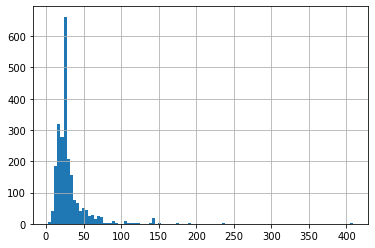

In [5]:
df_keff.SASA.hist(bins=100);

In [6]:
np.mean(df_keff.keff)

65.00000000000028

In [7]:
df_keff.to_excel('./keff_frompy.xlsx', index=None)

#### Median keff from Bar-Evan 2011

In [2]:
df_kin = pd.read_excel('./kineticParams_BarEvan2011.xls', sheet_name='1. KineticTable')

In [5]:
df_kin = df_kin[df_kin['Organism ID'] == 9]

In [8]:
kcats = [i for i in df_kin['kcat (1/sec)'] if pd.isnull(i) == False]

In [10]:
np.median(kcats)

21.75